In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf
import math
from finta import TA as ta

In [4]:
start = '2021-01-01'       # Begin date for downloading stock data format: YYYY-MM-DD         
end = dt.datetime.now()    # today

In [5]:
#Get input from the user
stock_symbol = input("Enter the ticker of the stock that you want to analyze/predict: ")

Enter the ticker of the stock that you want to analyze/predict: AAPL


In [6]:
stock_df = {}

In [7]:
 df = yf.download(stock_symbol,start, end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264984,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850845,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479843,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761627,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.881638,105158200


In [9]:
# get data from finta for RSI, MACD,
df=df.join(pd.DataFrame(ta.RSI(df),columns=None), how='outer')
df=df.rename(columns={"14 period RSI":"RSI_14_Day"})
df=df.join(pd.DataFrame(ta.MACD(df),columns=None), how='outer')
df=df.rename(columns={"MACD":"Moving Average Convergence Divergence_MACD"})
df=df.join(pd.DataFrame(ta.TSI(df),columns=None), how='outer')
df=df.rename(columns={"TSI":"True Strength Index TSI"})

In [10]:
df.head(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,SIGNAL,True Strength Index TSI,signal
Date,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264984,143301900,NaN,0.000000,0.000000,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850845,97664900,100.000000,0.035897,0.019943,NaN,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479843,155088000,25.199812,-0.091014,-0.025531,NaN,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761627,109578200,58.191200,0.009467,-0.013675,NaN,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.881638,105158200,62.811667,0.108833,0.022768,NaN,NaN
2021-01-11,129.190002,130.169998,128.500000,128.979996,127.838783,100384500,47.464429,0.035245,0.026150,NaN,NaN
2021-01-12,128.500000,129.690002,126.860001,128.800003,127.660385,91951100,46.743306,-0.020709,0.014291,NaN,NaN
2021-01-13,128.759995,131.449997,128.490005,130.889999,129.731903,88636800,55.245866,0.041505,0.020831,NaN,NaN
2021-01-14,130.800003,131.000000,128.759995,128.910004,127.769424,90221800,47.507625,-0.014280,0.012720,NaN,NaN


In [20]:
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [21]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,SIGNAL,True Strength Index TSI,signal,SMA_35,SMA_100,Vol_Avg,Vol_Avg_Ind,SMA_20,SMA_50
Date,,,,,,,,,,,,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264984,143301900,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850845,97664900,100.000000,0.035897,0.019943,NaN,NaN,NaN,NaN,NaN,4.897225e+09,NaN,NaN
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479843,155088000,25.199812,-0.091014,-0.025531,NaN,NaN,NaN,NaN,NaN,-6.074489e+09,NaN,NaN
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761627,109578200,58.191200,0.009467,-0.013675,NaN,NaN,NaN,NaN,NaN,-8.012923e+09,NaN,NaN
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.881638,105158200,62.811667,0.108833,0.022768,NaN,NaN,NaN,NaN,NaN,4.618609e+09,NaN,NaN


In [23]:
# Adding volume moving average column
Volume_MA = 10
#for i in Volume_MA:
df["Vol_Avg"]= df.iloc[:,5].rolling(window=Volume_MA).mean()

In [24]:
# Adding Moving average indicator
Volume_MAI = 0
#for i in Volume_MA:
df["Vol_Avg_Ind"]= df.iloc[:,5]/df.iloc[:,8]#.rolling(window=Volume_MA).mean()

In [25]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,RSI_14_Day,Moving Average Convergence Divergence_MACD,SIGNAL,True Strength Index TSI,signal,SMA_35,SMA_100,Vol_Avg,Vol_Avg_Ind,SMA_20,SMA_50
Date,,,,,,,,,,,,,,,,,
2022-03-14,151.449997,154.119995,150.100006,150.619995,150.399017,108732100,32.534970,-3.674262,-2.484667,-20.497544,-12.643593,165.841769,164.385988,95368100.0,-4.376123e+07,163.271114,167.735060
2022-03-15,150.899994,155.570007,150.380005,155.089996,154.862457,92964300,39.742195,-3.780661,-2.743866,-20.568365,-13.775703,165.661338,164.448268,96317090.0,-3.388077e+07,162.582625,167.290632
2022-03-16,157.050003,160.000000,154.460007,159.589996,159.355865,102300200,45.996781,-3.461964,-2.887486,-18.399880,-14.436300,165.661718,164.553292,98574630.0,-3.542882e+07,161.923593,166.847515
2022-03-17,158.610001,161.000000,157.630005,160.619995,160.384354,75615400,47.344011,-3.090654,-2.928119,-16.267663,-14.697923,165.694048,164.676467,98468330.0,-2.582388e+07,161.327968,166.471041
2022-03-18,160.509995,164.479996,159.759995,163.979996,163.739426,123511700,51.586997,-2.496487,-2.841793,-13.079862,-14.466772,165.835628,164.833690,102445780.0,-4.346260e+07,161.083327,166.257007
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.137375,95811400,53.276412,-1.890839,-2.651602,-9.985072,-13.826529,165.700591,164.998122,102385040.0,-3.613340e+07,160.987469,166.129172
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.572327,81532000,57.226123,-1.120365,-2.345355,-6.087197,-12.720910,165.536900,165.201584,97423410.0,-3.476319e+07,161.212138,166.066646
2022-03-23,167.990005,172.639999,167.649994,170.210007,169.960297,98062700,58.743731,-0.393066,-1.954897,-2.449366,-11.253547,165.417709,165.381881,98084190.0,-5.016259e+07,161.718394,166.031480
2022-03-24,171.059998,174.139999,170.210007,174.070007,173.814621,90131400,62.701331,0.489154,-1.466087,1.957595,-9.366241,165.373595,165.628305,96563130.0,-6.147754e+07,162.284063,166.015759


In [31]:
#Export to csv
df.to_csv('AAPL.csv')

In [32]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    RSI=df['RSI_14_Day']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i] and RSI[i]<=40):                          #line 9
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i] and RSI[i]>50):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)
    elif (RSI[i]<50 and RSI[i]>30):
        print('Hold')
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)
counter+=1
print(percentChange)

Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Hold
Hold
Hold
Hold
Hold
Hold
Up trend
Buy at the price122.07256317138672
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Down trend
Sell at the price126.02001190185547
Down trend
Hold
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Hold
Hold
Hold
Hold
Hold
Hold
Up trend
Buy at the price142.3409423828125
Up trend
Hold
Hold
Hold
Hold
Up trend
Up trend
Up trend
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Hold
Down trend
Sell at the price144.23297119140625
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down trend
Down

In [33]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2021-01-04 00:00:00 up to now with 4 trades:
SMAs used: [20, 50]
Total return over 4 trades: 12.86%


In [34]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'
if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)

Average Gain: 3.0802240730707195
Average Loss: 0
Max Return: 5.143478264071133
Max Loss: unknown
Gain/loss ratio: inf


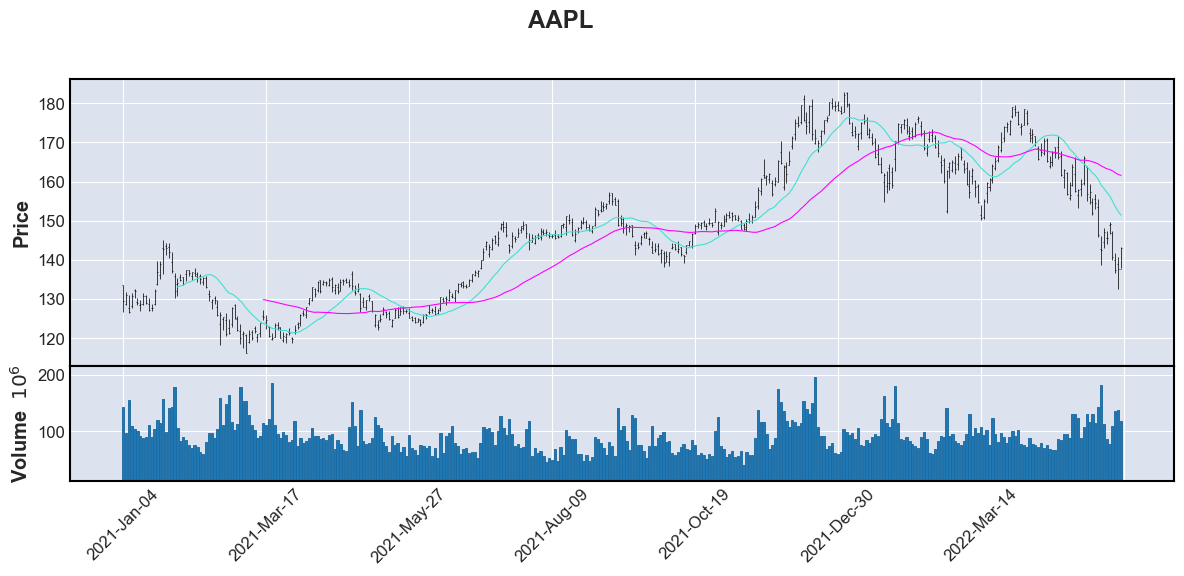

In [35]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), 
         mav=(short_sma,long_sma), 
         volume=True, title= str(stock_symbol), 
         style='default')